In [1]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pid import PID


In [2]:
img = cv2.imread('/home/keshav/cv-intro/media/test_image.png', cv2.IMREAD_GRAYSCALE)

In [3]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [4]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [5]:
def draw_tags(color_img, tags):
    for tag in tags:
        for idx in range(len(tag.corners)):
            cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

        cv2.putText(color_img, str(tag.tag_id),
                    org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=(0, 0, 255))

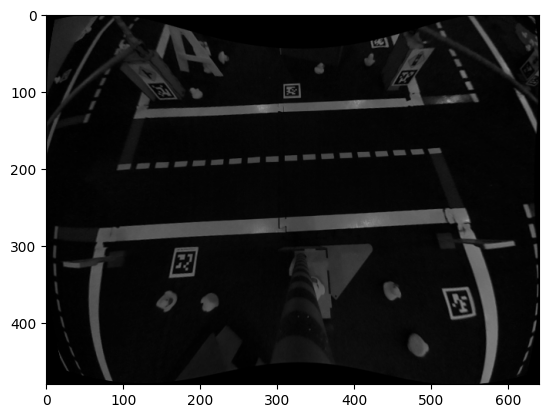

In [6]:
plt.imshow(color_img)

[[ 0.06945575 -0.11357916  0.53989323]]
[[ 0.06945575 -0.11357916  0.53989323]]
[[ 0.06945575 -0.11357916  0.53989323]]
[[ 0.06945575 -0.11357916  0.53989323]]
x_err 1096.567978083538
y_err 316.6836764538464
x:  2.77823007575617
y:  -4.543166240704525


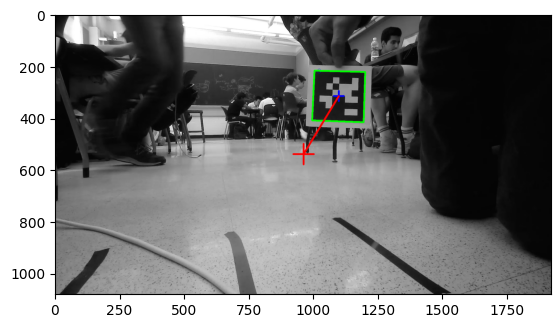

[[ 0.06940983 -0.11348073  0.53966214]]
[[ 0.06940983 -0.11348073  0.53966214]]
[[ 0.06940983 -0.11348073  0.53966214]]
[[ 0.06940983 -0.11348073  0.53966214]]
x_err 1096.567416426017
y_err 316.7456399142851
x:  2.7763931118343144
y:  -4.539229126593922


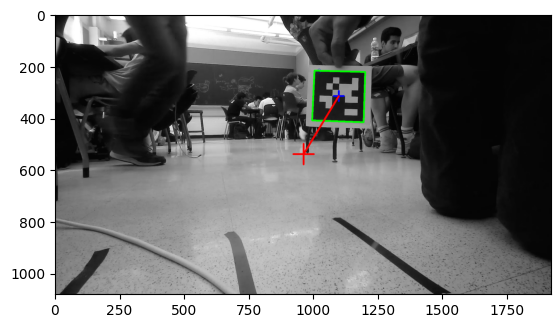

[[ 0.06933421 -0.11333941  0.53940458]]
[[ 0.06933421 -0.11333941  0.53940458]]
[[ 0.06933421 -0.11333941  0.53940458]]
[[ 0.06933421 -0.11333941  0.53940458]]
x_err 1096.4396142628045
y_err 316.95544908284063
x:  2.7733684253176576
y:  -4.5335764782337185


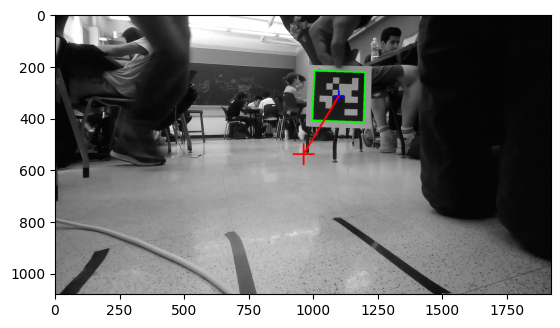

[[ 0.06919198 -0.11316691  0.53899644]]
[[ 0.06919198 -0.11316691  0.53899644]]
[[ 0.06919198 -0.11316691  0.53899644]]
[[ 0.06919198 -0.11316691  0.53899644]]
x_err 1096.2947726835296
y_err 317.09734195506167
x:  2.76767934078371
y:  -4.526676317637453


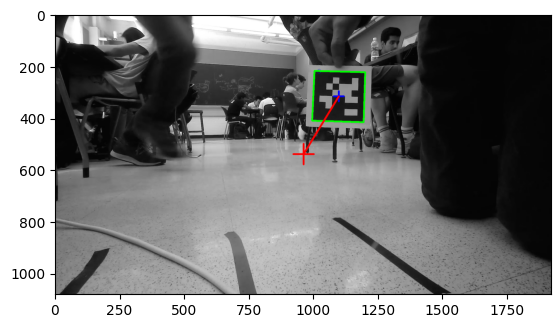

[[ 0.069049   -0.11290909  0.53845404]]
[[ 0.069049   -0.11290909  0.53845404]]
[[ 0.069049   -0.11290909  0.53845404]]
[[ 0.069049   -0.11290909  0.53845404]]
x_err 1096.1731247040927
y_err 317.38261331261737
x:  2.761959931305988
y:  -4.516363701950482


In [7]:
video = cv2.VideoCapture('/home/keshav/cv-intro/media/AprilTagTest1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_tags.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))


ret = True
count = 0
while ret:
    ret, frame = video.read()
    dimensions = frame.shape
    height = dimensions[0]/2
    width = dimensions[1]/2
    at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
    cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
    camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params = camera_params, tag_size=0.1)
    color_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    cv2.line(color_img, (int(920), int(540)), (int(1000), int(540)), (255,0,0), 5)
    cv2.line(color_img, (int(960), int(500)), (int(960), int(580)), (255,0,0), 5)
    draw_tags(color_img, tags)
    plt.imshow(color_img)
    pid_x = PID(10, 0, 0, 100)
    pid_y = PID(10, 0, 0, 100)
    try:
        # print(tags)
        x_error = 0
        y_error = 0
        center_x = 0
        center_y = 0
        for tag in tags:
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 5)
                translation_matrix = tag.pose_t.reshape(1,3)
                print(translation_matrix)
                
                x = translation_matrix[0][0]
                y = translation_matrix[0][1]
                z = translation_matrix[0][2]

                x_error += x
                y_error += y
                # output_video.write(color_img)
            center_x += tag.center[0]
            center_y += tag.center[1]



        center_x = center_x / len(tags)
        center_y = center_y / len(tags)
        print("x_err", center_x)
        print("y_err", center_y)
        cv2.line(color_img, (int(center_x-20), int(center_y)), (int(center_x+20), int(center_y)), (0,0,255), 5)
        cv2.line(color_img, (int(center_x), int(center_y-20)), (int(center_x), int(center_y+20)), (0,0,255), 5)

        cv2.line(color_img, (int(960), int(540)), (int(center_x), int(center_y)), (255,0,0), 5)
        avg_x_error = x_error / len(tags)
        avg_y_error = y_error / len(tags)
        x_output = pid_x.update(avg_x_error)
        y_output = pid_y.update(avg_y_error)
        print("x: ", x_output)
        print("y: ", y_output)
        p_img = color_img.copy()
        plt.imshow(p_img)
        plt.show()
    except:
        pass
        break
        
    
video.release()
output_video.release()